In [1]:
import tools
images, data, target = tools.load_data()

scaler, data = tools.scale(data)
pca, feature_reduced_data = tools.reduce(data, 40)

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_reduced_data, target, test_size=0.2, random_state=10)

In [3]:
from sklearn.model_selection import GridSearchCV
params = {'hidden_layer_sizes': [pow(10,x) for x in range(4)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=10), cv=10, n_jobs=-1)
cv.fit(X_train, y_train)

print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

print(cv.best_params_)

Train accuracy: 1.0
Test accuracy: 0.8390723822909346
{'alpha': 0.01, 'hidden_layer_sizes': 1000}


In [4]:
clf = MLPClassifier(hidden_layer_sizes=1000,alpha=0.0001, max_iter=1000)
clf.fit(X_train, y_train)
print("Train accuracy:",clf.score(X_train, y_train))
print("Test accuracy:",clf.score(X_test, y_test))

import numpy as np
preds = clf.predict_proba(feature_reduced_data)
preds_idx = np.argsort(-preds, axis = 1)

Train accuracy: 1.0
Test accuracy: 0.8404778636683063


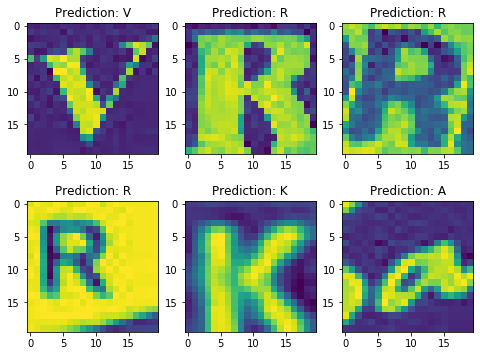

In [5]:
import random
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,3, figsize = (8,6))
img = random.randint(0,7112)
pred = clf.predict([feature_reduced_data[img]])
axs[0,0].set_title('Prediction: ' + pred[0].capitalize())
axs[0,0].imshow(images[img])

img = random.randint(0,7112)
pred = clf.predict([feature_reduced_data[img]])
axs[0,1].set_title('Prediction: ' + pred[0].capitalize())
axs[0,1].imshow(images[img])

img = random.randint(0,7112)
pred = clf.predict([feature_reduced_data[img]])
axs[0,2].set_title('Prediction: ' + pred[0].capitalize())
axs[0,2].imshow(images[img])

img = random.randint(0,7112)
pred = clf.predict([feature_reduced_data[img]])
axs[1,0].set_title('Prediction: ' + pred[0].capitalize())
axs[1,0].imshow(images[img])

img = random.randint(0,7112)
pred = clf.predict([feature_reduced_data[img]])
axs[1,1].set_title('Prediction: ' + pred[0].capitalize())
axs[1,1].imshow(images[img])

img = random.randint(0,7112)
pred = clf.predict([feature_reduced_data[img]])
axs[1,2].set_title('Prediction: ' + pred[0].capitalize())
axs[1,2].imshow(images[img])

plt.show()

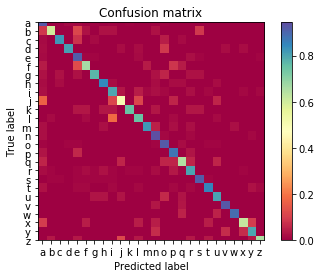

In [6]:
tools.plot_confusion_matrix(y_test, clf.predict(X_test), clf.classes_, "Confusion matrix")